# Pydy Tuesday 16-09-2025 - All Recipes

### 1. Import Libraries

In [225]:
import sys
import pydytuesday
import pandas as pd

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [226]:
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("plotly:", plotly.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
matplotlib: 3.6.2
plotly: 6.1.2


### 2.a. Load Data from the official pydytuesday repo

In [227]:
# Use date to fetch the files for that week
pydytuesday.get_date('2025-09-16')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-09-16/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-09-16/readme.md
Error downloading files: [Errno 13] Permission denied: 'all_recipes.csv'


### 2.b. Load data into dataframe using Pandas and do initial exploration

In [228]:
# Load datasets using Pandas 
recipes = pd.read_csv('all_recipes.csv')
cuisines = pd.read_csv('cuisines.csv')


In [ ]:
# See info for recipes df
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14426 entries, 0 to 14425
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            14426 non-null  object 
 1   url             14426 non-null  object 
 2   author          14426 non-null  object 
 3   date_published  14426 non-null  object 
 4   ingredients     14417 non-null  object 
 5   calories        14226 non-null  float64
 6   fat             14070 non-null  float64
 7   carbs           14212 non-null  float64
 8   protein         14178 non-null  float64
 9   avg_rating      13454 non-null  float64
 10  total_ratings   13454 non-null  float64
 11  reviews         13353 non-null  float64
 12  prep_time       14426 non-null  int64  
 13  cook_time       14426 non-null  int64  
 14  total_time      14426 non-null  int64  
 15  servings        14405 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 1.8+ MB


In [ ]:
# See info for cuisines df
cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2218 non-null   object 
 1   country         2218 non-null   object 
 2   url             2218 non-null   object 
 3   author          2218 non-null   object 
 4   date_published  2218 non-null   object 
 5   ingredients     2217 non-null   object 
 6   calories        2186 non-null   float64
 7   fat             2163 non-null   float64
 8   carbs           2183 non-null   float64
 9   protein         2179 non-null   float64
 10  avg_rating      2121 non-null   float64
 11  total_ratings   2121 non-null   float64
 12  reviews         2110 non-null   float64
 13  prep_time       2218 non-null   int64  
 14  cook_time       2218 non-null   int64  
 15  total_time      2218 non-null   int64  
 16  servings        2216 non-null   float64
dtypes: float64(8), int64(3), object(6

In [242]:
# Set option to view data in single line
pd.set_option('display.width', 1000)

# See statistical info of numeric features
print("All Recipes : \n", recipes.describe())

print(f"\n { '-' * 100} \n")

print("Cuisines: \n", cuisines.describe())

All Recipes : 
            calories           fat         carbs       protein    avg_rating  total_ratings       reviews     prep_time     cook_time    total_time      servings
count  14226.000000  14070.000000  14212.000000  14178.000000  13454.000000   13454.000000  13353.000000  14426.000000  14426.000000  14426.000000  14405.000000
mean     344.878532     17.835537     32.863425     14.422344      4.525606     102.620262     94.418483     17.345002     42.515943    144.065645     11.028393
std      250.020621     16.679835     27.590609     17.528592      0.409127     172.979317    164.522217     24.872135     96.819185    874.250121     13.026444
min        1.000000      0.000000      0.000000      0.000000      1.000000       1.000000      1.000000      0.000000      0.000000      0.000000      1.000000
25%      181.000000      7.000000     14.000000      3.000000      4.400000       5.000000      5.000000     10.000000     10.000000     30.000000      4.000000
50%      307.00000

In [232]:
# See data samples
print("\n Recipes Data sample rows:\n", recipes.head())

print(f"\n { '-' * 100} \n")

print("Cuisines sample rows: \n", cuisines.head())



 Recipes Data sample rows:
                                        name                                                url         author date_published                                        ingredients  calories   fat  carbs  protein  avg_rating  total_ratings  reviews  prep_time  cook_time  total_time  servings
0  Chewy Whole Wheat Peanut Butter Brownies  https://www.allrecipes.com/recipe/140717/chewy...         DMOMMY     2020-06-18  ⅓ cup margarine, softened, ⅔ cup white sugar, ...     222.0  13.0   24.0      6.0         4.4           47.0     36.0         20         35          55      16.0
1                        Pumpkin Pie Eggnog  https://www.allrecipes.com/recipe/269204/pumpk...   Bobbie Susan     2022-09-26  12  egg yolks, 2 cups heavy whipping cream, ½ ...     477.0  31.0   43.0      8.0         5.0            1.0      1.0         10          5         495       8.0
2              Eggs Poached in Tomato Sauce  https://www.allrecipes.com/recipe/238054/eggs-...           Br

Observation: 'cuisines' df is a subset of 'recipes' df, with an additional column 'country' mapping the recipes to a country or region.

In [233]:
# Check for nulls in  df
recipes.isnull().sum()

name                 0
url                  0
author               0
date_published       0
ingredients          9
calories           200
fat                356
carbs              214
protein            248
avg_rating         972
total_ratings      972
reviews           1073
prep_time            0
cook_time            0
total_time           0
servings            21
dtype: int64

In [234]:
cuisines.isnull().sum()

name                0
country             0
url                 0
author              0
date_published      0
ingredients         1
calories           32
fat                55
carbs              35
protein            39
avg_rating         97
total_ratings      97
reviews           108
prep_time           0
cook_time           0
total_time          0
servings            2
dtype: int64

In [245]:
# Check how many unique countries/regions are available in the 'cuisines' df.
print("No. of unique countries/regions mapped to recipes as cuisines: ", cuisines['country'].nunique())

No. of unique countries/regions mapped to recipes as cuisines:  49


### 3. Exploratory Data Analysis

#### 3.1 See distribution of the numeric fields 

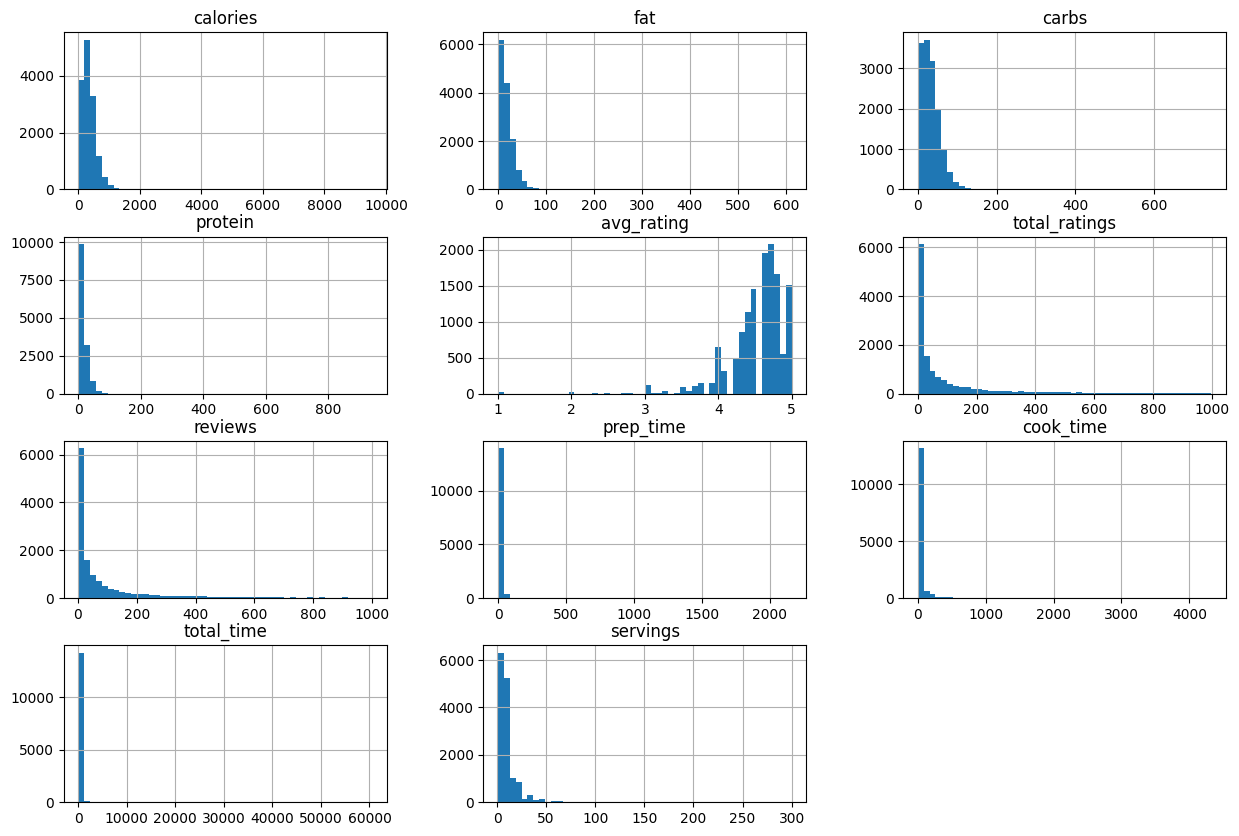

In [ ]:
# Histogram plots for numeric fields 
recipes.hist(figsize=(15,10), bins=50)
plt.show()

#### 3.2 See some top cuisines

In [ ]:
# Filter top cuisines with criteria: total_ratings > 900 and avg_rating 4.5 and above to balance quantity and quality
# Intuition: A cuisine being rated by 900+ people and achieving an average rating of 4.5+ on a scale of 1 to 5, is safe to be considered as popular.
# However, this is not an exhaustive criteria at all, and there are possibly other popular recipes/cuisines as well which are not covered under this criteria.
top_cuisines = (cuisines[
    (
    (cuisines['total_ratings'] > 900) & (cuisines['avg_rating'] >= 4.5))
    ])
print(top_cuisines.nunique())

# Sort by total_ratings
top_cuisines = top_cuisines.sort_values('total_ratings', ascending=True)


# Build sunburst: country -> recipe
fig = px.sunburst(
    top_cuisines,
    path=['country', 'name'],   # hierarchy
    values='total_ratings',     # slice size = total ratings
    color='avg_rating',            # color by avg_rating
    color_continuous_scale='YlOrRd',
    hover_data=['author', 'avg_rating', 'total_ratings', 'calories'],
)

# Make some changes in layout specifications
fig.update_layout(
    title=dict(
        text="Recipes and their cuisines, Loved by 900+ people with Avg Rating 4.5+",
        x=0.5,            # center
        xanchor='center',
        yanchor='top',
        font=dict(size=24, family="Monotype Corsiva", weight='bold', color="maroon")
    ),
    width=650,   # increase for bigger plot
    height=500,  
    margin=dict(t=50, l=0, r=0, b=50),  # reduce margins
    annotations=[
        dict(
            text="Data Source: 'www.allrecipes.com', brought by TidyTuesday 16-09-2025",   # text to display
            x=0.5,                          # center horizontally
            y=-0.1,                         # below the chart
            showarrow=False,
            xref="paper", yref="paper",     # relative to entire figure
            font=dict(size=12, color="gray", family="Arial")
        )
    ]
)

# Adjustments on font size and marker colors
fig.update_traces(textfont_size=14, marker=dict(line=dict(color='gray')))

# Display plot
fig.show()

name              5
country           5
url               5
author            5
date_published    5
ingredients       5
calories          4
fat               4
carbs             4
protein           4
avg_rating        4
total_ratings     5
reviews           5
prep_time         3
cook_time         4
total_time        5
servings          3
dtype: int64


#### 3.3 Plot popular cuisines on a geo map to visualise across the globe

In [246]:
# Group by country
country_stats = cuisines.groupby('country').agg(
    num_recipes=('name', 'count'),
    avg_rating=('avg_rating', 'mean'),
    avg_total_ratings=('total_ratings', 'mean')
).reset_index()

# Sort by number of recipes
country_stats = country_stats.sort_values('num_recipes', ascending=False)
top_countries = country_stats.sort_values('num_recipes', ascending=False).head(17)

print(top_countries)  # top N countries

# Map cuisine names → actual country names for geo map
cuisine_to_country = {
    'Brazilian': 'Brazil',
    'Canadian': 'Canada',
    'Filipino': 'Philippines',
    'Chinese': 'China',
    'Australian and New Zealander': 'Australia',
    'French': 'France',
    'Russian': 'Russia',
    'Indian': 'India',
    'Cuban': 'Cuba',
    'Italian': 'Italy',
    'Soul Food': 'USA',
    'Cajun and Creole': 'USA',
    'Japanese': 'Japan',
    'Greek': 'Greece',
    'Vietnamese': 'Vietnam',
    'Thai': 'Thailand'
}

# Add a new column 'country_name'
top_countries['country_name'] = top_countries['country'].map(cuisine_to_country)

# Build a geo scatter plot
fig = px.scatter_geo(
    top_countries,
    locations='country_name',      # use mapped country names
    locationmode='country names',
    size='avg_total_ratings',
    color='avg_rating',
    color_continuous_scale='YlOrRd',
    hover_name='country',
    hover_data=['num_recipes', 'avg_rating', 'avg_total_ratings'],
    projection='natural earth',
    title='Top Cuisines Around the World by Number of Recipes, Avg Rating, and Number of Ratings'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True), width=1000, height=500)
fig.show()


                         country  num_recipes  avg_rating  avg_total_ratings
6                      Brazilian           67    4.254839          77.967742
8                       Canadian           67    4.547761         135.044776
15                      Filipino           66    4.434375          54.203125
10                       Chinese           65    4.579688         110.171875
2   Australian and New Zealander           65    4.362903          77.080645
17                        French           65    4.691935         167.612903
37                       Russian           65    4.572308          50.630769
20                        Indian           65    4.504688          92.687500
12                         Cuban           65    4.521538          70.030769
23                       Italian           64    4.654386          23.035088
39                     Soul Food           63    4.565079         133.476190
7               Cajun and Creole           63    4.613333         158.733333

#### 3.4 Visualise a few top recipes across a few selected popular cuisines

In [251]:
# Select some popular cuisines from the previous exploration - based on the following combination of key indicators:
# num_recipes: 62 and above - to indicate variety
# mean avg_rating: 4.5 and above - to indicate quality
# avg total_ratings: 90+ - rated by a descent number of people indicating popularity
selected_cuisines = ['French', 'Canadian', 'Chinese', 'Indian', 'Cajun and Creole', 'Soul Food', 'Thai', 'Greek']

# Add continent mapping 
cuisine_to_continent = {
    'French': 'Europe',
    'Greek': 'Europe',
    'Canadian': 'Americas',
    'Cajun and Creole': 'Americas',
    'Soul Food': 'Americas',
    'Chinese': 'Asia',
    'Indian': 'Asia',
    'Thai': 'Asia'
}

# Filter recipes from above selected cuisines, based on criteria: avg_rating >= 4.5 and total_ratings >=500
filtered_recipes = cuisines[
    (cuisines['country'].isin(selected_cuisines)) &
    (cuisines['avg_rating'] >= 4.5) &
    (cuisines['total_ratings'] >= 500)
].copy()

# Add continent column
filtered_recipes['continent'] = filtered_recipes['country'].map(cuisine_to_continent)

# Keep only necessary columns for sunburst
sunburst_df = filtered_recipes[['continent', 'country', 'name', 'total_ratings', 'avg_rating', 'calories', 'fat', 'carbs', 'protein']]

# Pick top 5 recipes per cuisine by total_ratings (it could also be done by avg_rating instead of total_ratings)
sunburst_df = sunburst_df.sort_values(['country', 'total_ratings'], ascending=[True, False])
top_recipes_per_cuisine = sunburst_df.groupby('country').head(5).reset_index(drop=True)

print(top_recipes_per_cuisine.head())


  continent           country                                    name  total_ratings  avg_rating  calories   fat  carbs  protein
0  Americas  Cajun and Creole  Chef John's Sausage & Shrimp Jambalaya          848.0         4.7     495.0  25.0   37.0     30.0
1  Americas  Cajun and Creole                    Easy Cajun Jambalaya          793.0         4.5     488.0  14.0   59.0     29.0
2  Americas  Cajun and Creole         Cajun Chicken and Sausage Gumbo          653.0         4.7     480.0  40.0   15.0     16.0
3  Americas  Cajun and Creole             Chef John's Shrimp Étouffée          648.0         4.9     424.0  15.0   30.0     41.0
4  Americas  Cajun and Creole                  Creole Seasoning Blend          516.0         4.8      16.0   0.0    3.0      1.0


In [252]:
# Plot an interactive Sunburst chart with: 
# innermost layer: continent
# next layer: country/region
# 3rd layer: recipe name
# outermost layer: calories in that recipe

# Add a string 'cal' for calorie along with the numeric value of calories
top_recipes_per_cuisine['calories_label'] = top_recipes_per_cuisine['calories'].astype(int).astype(str) + ' cal'

# Build a Sunburst Chart
fig = px.sunburst(
    top_recipes_per_cuisine,
    path=['continent', 'country', 'name', 'calories_label'],
    values='total_ratings',
    color='avg_rating',
    color_continuous_scale='YlOrBr',
    hover_data=['total_ratings','avg_rating', 'calories', 'fat', 'carbs', 'protein'],
    title="Most Popular Recipes within Selected Cuisines by Continent"
)

# Adjust layout specifications like size of chart (width, height), title, annotations 
fig.update_layout(width=1050, height=950, 
                  title=dict(
                        text="Most Popular Recipes within Selected Cuisines by Continent",
                        x=0.5,            # center
                        xanchor='center',
                        yanchor='top',
                        font=dict(size=30, family="Monotype Corsiva", weight='bold', color="maroon")
                    ),
                    annotations=[
                        dict(
                            text="This sunburst shows top recipes by Continent (Innermost) → Cuisine → Recipe → Calories. <br> " \
                            "Further details like fat, carbs, protein, and avg_rating available on hover. <br>" \
                            "Note: This is not an exhaustive list of top recipes or cuisines, the ranking is based on multiple key indicators (num_recipes = variety, avg_rating = quality, total_ratings = popularity). "
                            "<br> Data Source: 'www.allrecipes.com', brought by TidyTuesday 16-09-2025. Visualisation by Saumita Haldar",   # text to display
                            x=0.5,                          # center horizontally
                            y=-0.1,                         # below the chart
                            showarrow=False,
                            xref="paper", yref="paper",     # relative to entire figure
                            font=dict(size=12, color="gray", family="Arial")
                        )
                    ])

# Adjust font size within sunburst chart
fig.update_traces(textfont_size=20)

# Display the chart
fig.show()

# Save the chart as an html file to make it shareable as an interactive plot
fig.write_html("top_recipes_sunburst.html", include_plotlyjs='cdn', full_html=True)
